In [67]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Flatten, Activation
from keras.layers import Dropout,BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import RMSprop, Adam
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report , accuracy_score


In [68]:
test  = pd.read_csv(r"C:\Users\phaneendra.veguru\Desktop\ml\har\DATA_UCI/test.csv")  
train = pd.read_csv(r"C:\Users\phaneendra.veguru\Desktop\ml\har\DATA_UCI/train.csv")  

In [69]:
# suffling data 
from sklearn.utils import shuffle

test  = shuffle(test)
train = shuffle(train)

In [70]:
train = train.drop("subject", axis=1)
test = test.drop("subject", axis=1)

In [71]:
# separating data inputs and output lables 
trainData  = train.drop('Activity' , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values

In [72]:
# encoding labels 
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

# encoding test labels 
encoder.fit(testLabel)
test_target = encoder.transform(testLabel)

# encoding train labels 
encoder.fit(trainLabel)
train_target = encoder.transform(trainLabel)

In [73]:
train.shape,trainData.shape,train_target.shape,testData.shape,test_target.shape

((7352, 562), (7352, 561), (7352,), (2947, 561), (2947,))

In [74]:
#define the encoder function.
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

train_target= one_hot_encode(train_target)
test_target = one_hot_encode(test_target)

In [75]:
train.shape,trainData.shape,train_target.shape,testData.shape,test_target.shape


((7352, 562), (7352, 561), (7352, 6), (2947, 561), (2947, 6))

In [76]:
train_target

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [77]:
def confusionMatrix(pred):
    pred = np.argmax(pred,axis = 1) 
    y_true = np.argmax(test_target,axis = 1)
    print(classification_report(y_true, pred))
    CM = confusion_matrix(y_true, pred)
    fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(15, 5))
    plt.show()


# Supervised Neural Network using multi-layer preceptron
 MLP classifier using Stochastic gradient descent optimizer

In [78]:
from sklearn.neural_network import MLPClassifier
mlpSGD  =  MLPClassifier(hidden_layer_sizes=(90,), max_iter=2000 , alpha=1e-4, solver='sgd' , verbose=10 ,
                            tol=1e-19 , random_state=1, learning_rate_init=.001)

Iteration 1, loss = 2.66011569
Iteration 2, loss = 1.90452389
Iteration 3, loss = 1.67446284
Iteration 4, loss = 1.52543406
Iteration 5, loss = 1.40899303
Iteration 6, loss = 1.31089765
Iteration 7, loss = 1.22996795
Iteration 8, loss = 1.15943645
Iteration 9, loss = 1.09715611
Iteration 10, loss = 1.04374194
Iteration 11, loss = 0.99565198
Iteration 12, loss = 0.95316505
Iteration 13, loss = 0.91396123
Iteration 14, loss = 0.87939895
Iteration 15, loss = 0.84720441
Iteration 16, loss = 0.81820188
Iteration 17, loss = 0.79124648
Iteration 18, loss = 0.76631412
Iteration 19, loss = 0.74403683
Iteration 20, loss = 0.72217336
Iteration 21, loss = 0.70269649
Iteration 22, loss = 0.68584321
Iteration 23, loss = 0.66789397
Iteration 24, loss = 0.65223088
Iteration 25, loss = 0.63623744
Iteration 26, loss = 0.62199800
Iteration 27, loss = 0.60928236
Iteration 28, loss = 0.59722796
Iteration 29, loss = 0.58591594
Iteration 30, loss = 0.57388251
Iteration 31, loss = 0.56361943
Iteration 32, los

Iteration 253, loss = 0.12852750
Iteration 254, loss = 0.12837218
Iteration 255, loss = 0.12728993
Iteration 256, loss = 0.12721532
Iteration 257, loss = 0.12810689
Iteration 258, loss = 0.12672590
Iteration 259, loss = 0.12585616
Iteration 260, loss = 0.12620529
Iteration 261, loss = 0.12537965
Iteration 262, loss = 0.12668237
Iteration 263, loss = 0.12519283
Iteration 264, loss = 0.12547885
Iteration 265, loss = 0.12470418
Iteration 266, loss = 0.12416977
Iteration 267, loss = 0.12385147
Iteration 268, loss = 0.12303730
Iteration 269, loss = 0.12296633
Iteration 270, loss = 0.12225074
Iteration 271, loss = 0.12233128
Iteration 272, loss = 0.12279040
Iteration 273, loss = 0.12193832
Iteration 274, loss = 0.12183471
Iteration 275, loss = 0.12112169
Iteration 276, loss = 0.12058895
Iteration 277, loss = 0.12069582
Iteration 278, loss = 0.11953668
Iteration 279, loss = 0.11903505
Iteration 280, loss = 0.12032121
Iteration 281, loss = 0.11938137
Iteration 282, loss = 0.11951177
Iteration 

Iteration 502, loss = 0.08183686
Iteration 503, loss = 0.08216671
Iteration 504, loss = 0.08227828
Iteration 505, loss = 0.08217398
Iteration 506, loss = 0.08187073
Iteration 507, loss = 0.08096572
Iteration 508, loss = 0.08239138
Iteration 509, loss = 0.08142495
Iteration 510, loss = 0.08077363
Iteration 511, loss = 0.08101972
Iteration 512, loss = 0.08083962
Iteration 513, loss = 0.08039738
Iteration 514, loss = 0.08086767
Iteration 515, loss = 0.08047528
Iteration 516, loss = 0.08021165
Iteration 517, loss = 0.08113940
Iteration 518, loss = 0.07990992
Iteration 519, loss = 0.08060619
Iteration 520, loss = 0.08079380
Iteration 521, loss = 0.07973365
Iteration 522, loss = 0.07980556
Iteration 523, loss = 0.07970108
Iteration 524, loss = 0.07908455
Iteration 525, loss = 0.07940754
Iteration 526, loss = 0.07950840
Iteration 527, loss = 0.07980794
Iteration 528, loss = 0.07946459
Iteration 529, loss = 0.07991109
Iteration 530, loss = 0.07911160
Iteration 531, loss = 0.07956671
Iteration 

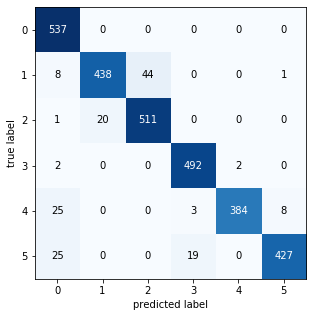

In [79]:
nnModelSGD  = mlpSGD.fit(trainData , train_target)
y_pred = nnModelSGD.predict(testData)
score = accuracy_score(test_target, y_pred)
confusionMatrix(y_pred)

MLP classifier using ADAM optimizer

In [80]:
mlpADAM =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=1000 , alpha=1e-4  \
                        , solver='adam' , verbose=10  \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001)

Iteration 1, loss = 2.01945163
Iteration 2, loss = 1.10770929
Iteration 3, loss = 0.80403612
Iteration 4, loss = 0.64404840
Iteration 5, loss = 0.54044988
Iteration 6, loss = 0.46486123
Iteration 7, loss = 0.41148631
Iteration 8, loss = 0.36862489
Iteration 9, loss = 0.33624916
Iteration 10, loss = 0.30571161
Iteration 11, loss = 0.29006298
Iteration 12, loss = 0.26148418
Iteration 13, loss = 0.24557203
Iteration 14, loss = 0.23043850
Iteration 15, loss = 0.22050019
Iteration 16, loss = 0.20351132
Iteration 17, loss = 0.19520283
Iteration 18, loss = 0.18476963
Iteration 19, loss = 0.17487672
Iteration 20, loss = 0.16118421
Iteration 21, loss = 0.15572102
Iteration 22, loss = 0.15560776
Iteration 23, loss = 0.14471087
Iteration 24, loss = 0.13972226
Iteration 25, loss = 0.13694395
Iteration 26, loss = 0.13435368
Iteration 27, loss = 0.12385920
Iteration 28, loss = 0.12695938
Iteration 29, loss = 0.11826113
Iteration 30, loss = 0.11731006
Iteration 31, loss = 0.11643849
Iteration 32, los

Iteration 253, loss = 0.00407561
Iteration 254, loss = 0.00309472
Iteration 255, loss = 0.00296706
Iteration 256, loss = 0.00354590
Iteration 257, loss = 0.00481668
Iteration 258, loss = 0.00555819
Iteration 259, loss = 0.00455850
Iteration 260, loss = 0.00413867
Iteration 261, loss = 0.00343464
Iteration 262, loss = 0.00292499
Iteration 263, loss = 0.00270319
Iteration 264, loss = 0.00295851
Iteration 265, loss = 0.00266471
Iteration 266, loss = 0.00334510
Iteration 267, loss = 0.00264694
Iteration 268, loss = 0.00242426
Iteration 269, loss = 0.00265660
Iteration 270, loss = 0.00270571
Iteration 271, loss = 0.00250051
Iteration 272, loss = 0.00243540
Iteration 273, loss = 0.00326228
Iteration 274, loss = 0.00251849
Iteration 275, loss = 0.00216238
Iteration 276, loss = 0.00214907
Iteration 277, loss = 0.00285561
Iteration 278, loss = 0.00215581
Iteration 279, loss = 0.00218893
Iteration 280, loss = 0.00258855
Iteration 281, loss = 0.01468105
Iteration 282, loss = 0.00469005
Iteration 

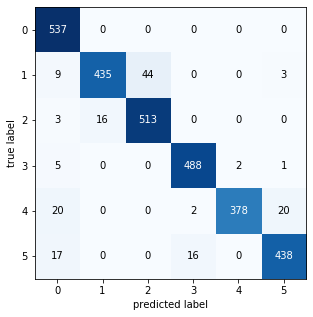

In [81]:
nnModelADAM = mlpADAM.fit(trainData , train_target)
y_pred = nnModelADAM.predict(testData)
score = accuracy_score(test_target, y_pred)
confusionMatrix(y_pred)

# Neural Network Model Using Keras

In [82]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=561))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

Epoch 1/500
7352/7352 [==============================] - 1s 119us/step - loss: 1.4372 - accuracy: 0.38471s - loss: 1.8245 - accuracy: 0.25 - ETA: 1s - loss: 1.7928 - ac
Epoch 2/500
7352/7352 [==============================] - 1s 74us/step - loss: 0.9311 - accuracy: 0.5875
Epoch 3/500
7352/7352 [==============================] - 1s 73us/step - loss: 0.7271 - accuracy: 0.6813
Epoch 4/500
7352/7352 [==============================] - 0s 57us/step - loss: 0.6078 - accuracy: 0.7346
Epoch 5/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.5522 - accuracy: 0.7512
Epoch 6/500
7352/7352 [==============================] - 0s 64us/step - loss: 0.4859 - accuracy: 0.7879
Epoch 7/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.4402 - accuracy: 0.8075
Epoch 8/500
7352/7352 [==============================] - 0s 66us/step - loss: 0.4025 - accuracy: 0.8271
Epoch 9/500
7352/7352 [==============================] - 0s 65us/step - loss: 0.3839 - accuracy: 0.8384

7352/7352 [==============================] - 0s 62us/step - loss: 0.1529 - accuracy: 0.9416
Epoch 78/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.1781 - accuracy: 0.9357
Epoch 79/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.1603 - accuracy: 0.9397
Epoch 80/500
7352/7352 [==============================] - 0s 60us/step - loss: 0.1641 - accuracy: 0.9408
Epoch 81/500
7352/7352 [==============================] - 1s 68us/step - loss: 0.1689 - accuracy: 0.9323
Epoch 82/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.1705 - accuracy: 0.9363
Epoch 83/500
7352/7352 [==============================] - 0s 56us/step - loss: 0.1536 - accuracy: 0.9436
Epoch 84/500
7352/7352 [==============================] - 0s 55us/step - loss: 0.1674 - accuracy: 0.9329
Epoch 85/500
7352/7352 [==============================] - 0s 56us/step - loss: 0.1491 - accuracy: 0.9475
Epoch 86/500
7352/7352 [==============================] - 0s 58us/st

7352/7352 [==============================] - 0s 52us/step - loss: 0.1443 - accuracy: 0.9433
Epoch 154/500
7352/7352 [==============================] - 0s 60us/step - loss: 0.1466 - accuracy: 0.9438
Epoch 155/500
7352/7352 [==============================] - 0s 56us/step - loss: 0.1312 - accuracy: 0.9513
Epoch 156/500
7352/7352 [==============================] - 0s 57us/step - loss: 0.1307 - accuracy: 0.9528
Epoch 157/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.1294 - accuracy: 0.9548
Epoch 158/500
7352/7352 [==============================] - 0s 62us/step - loss: 0.1355 - accuracy: 0.9529
Epoch 159/500
7352/7352 [==============================] - 0s 52us/step - loss: 0.1345 - accuracy: 0.9516
Epoch 160/500
7352/7352 [==============================] - 0s 56us/step - loss: 0.1228 - accuracy: 0.9581
Epoch 161/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.1209 - accuracy: 0.9587
Epoch 162/500
7352/7352 [==============================] - 0

7352/7352 [==============================] - 0s 61us/step - loss: 0.1137 - accuracy: 0.9618
Epoch 230/500
7352/7352 [==============================] - 0s 56us/step - loss: 0.1052 - accuracy: 0.9663
Epoch 231/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.0967 - accuracy: 0.9674
Epoch 232/500
7352/7352 [==============================] - 0s 55us/step - loss: 0.1019 - accuracy: 0.9640
Epoch 233/500
7352/7352 [==============================] - 0s 56us/step - loss: 0.1085 - accuracy: 0.9631
Epoch 234/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.1070 - accuracy: 0.9627
Epoch 235/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.1001 - accuracy: 0.9661
Epoch 236/500
7352/7352 [==============================] - 0s 60us/step - loss: 0.0990 - accuracy: 0.9669
Epoch 237/500
7352/7352 [==============================] - 0s 57us/step - loss: 0.0994 - accuracy: 0.9669
Epoch 238/500
7352/7352 [==============================] - 0

7352/7352 [==============================] - 0s 51us/step - loss: 0.0880 - accuracy: 0.9709
Epoch 306/500
7352/7352 [==============================] - ETA: 0s - loss: 0.0884 - accuracy: 0.97 - 0s 63us/step - loss: 0.0897 - accuracy: 0.9717
Epoch 307/500
7352/7352 [==============================] - 0s 57us/step - loss: 0.0897 - accuracy: 0.9676
Epoch 308/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.0947 - accuracy: 0.9652
Epoch 309/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.1001 - accuracy: 0.9635
Epoch 310/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.0892 - accuracy: 0.9668
Epoch 311/500
7352/7352 [==============================] - 0s 61us/step - loss: 0.0939 - accuracy: 0.9682
Epoch 312/500
7352/7352 [==============================] - 0s 56us/step - loss: 0.0909 - accuracy: 0.9678
Epoch 313/500
7352/7352 [==============================] - 0s 57us/step - loss: 0.0913 - accuracy: 0.9693
Epoch 314/500
7352

7352/7352 [==============================] - 0s 58us/step - loss: 0.1130 - accuracy: 0.9578
Epoch 382/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.1044 - accuracy: 0.9646
Epoch 383/500
7352/7352 [==============================] - 0s 55us/step - loss: 0.0884 - accuracy: 0.9697
Epoch 384/500
7352/7352 [==============================] - 0s 51us/step - loss: 0.0991 - accuracy: 0.9650
Epoch 385/500
7352/7352 [==============================] - 0s 53us/step - loss: 0.0905 - accuracy: 0.9702
Epoch 386/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.0920 - accuracy: 0.9678
Epoch 387/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.0885 - accuracy: 0.9703
Epoch 388/500
7352/7352 [==============================] - 0s 67us/step - loss: 0.0896 - accuracy: 0.9682
Epoch 389/500
7352/7352 [==============================] - 0s 65us/step - loss: 0.0999 - accuracy: 0.9650
Epoch 390/500
7352/7352 [==============================] - 0

7352/7352 [==============================] - 0s 57us/step - loss: 0.0912 - accuracy: 0.9669
Epoch 458/500
7352/7352 [==============================] - 0s 57us/step - loss: 0.0899 - accuracy: 0.9680
Epoch 459/500
7352/7352 [==============================] - 0s 62us/step - loss: 0.0895 - accuracy: 0.9702
Epoch 460/500
7352/7352 [==============================] - 0s 65us/step - loss: 0.0878 - accuracy: 0.9683
Epoch 461/500
7352/7352 [==============================] - 0s 66us/step - loss: 0.0993 - accuracy: 0.9648
Epoch 462/500
7352/7352 [==============================] - 0s 60us/step - loss: 0.0927 - accuracy: 0.9671
Epoch 463/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.0848 - accuracy: 0.9708
Epoch 464/500
7352/7352 [==============================] - 0s 57us/step - loss: 0.0988 - accuracy: 0.9650
Epoch 465/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.0930 - accuracy: 0.9672
Epoch 466/500
7352/7352 [==============================] - 0

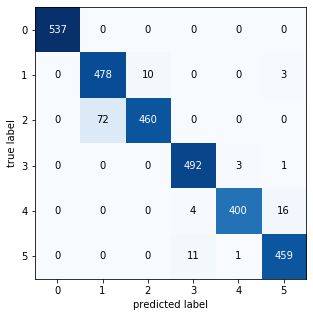

In [83]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.fit(trainData, train_target,epochs=500,batch_size=128)
score = model.evaluate(testData, test_target, batch_size=128)
print(score)
y_pred = model.predict(testData)
confusionMatrix(y_pred)


Epoch 1/500
7352/7352 [==============================] - 1s 145us/step - loss: 0.0974 - accuracy: 0.9682
Epoch 2/500
7352/7352 [==============================] - 1s 76us/step - loss: 0.0852 - accuracy: 0.9714
Epoch 3/500
7352/7352 [==============================] - 1s 77us/step - loss: 0.0900 - accuracy: 0.9714
Epoch 4/500
7352/7352 [==============================] - 0s 67us/step - loss: 0.0948 - accuracy: 0.9669
Epoch 5/500
7352/7352 [==============================] - 0s 63us/step - loss: 0.0979 - accuracy: 0.9664
Epoch 6/500
7352/7352 [==============================] - 0s 60us/step - loss: 0.0760 - accuracy: 0.9761
Epoch 7/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.0790 - accuracy: 0.9729
Epoch 8/500
7352/7352 [==============================] - 0s 64us/step - loss: 0.0883 - accuracy: 0.9706
Epoch 9/500
7352/7352 [==============================] - 0s 66us/step - loss: 0.0935 - accuracy: 0.9660
Epoch 10/500
7352/7352 [==============================] - 0s 67

7352/7352 [==============================] - 1s 77us/step - loss: 0.0977 - accuracy: 0.9675
Epoch 79/500
7352/7352 [==============================] - 1s 79us/step - loss: 0.0916 - accuracy: 0.9699
Epoch 80/500
7352/7352 [==============================] - 1s 86us/step - loss: 0.0817 - accuracy: 0.9747
Epoch 81/500
7352/7352 [==============================] - 1s 89us/step - loss: 0.1001 - accuracy: 0.9661
Epoch 82/500
7352/7352 [==============================] - 1s 79us/step - loss: 0.0970 - accuracy: 0.9652
Epoch 83/500
7352/7352 [==============================] - 0s 57us/step - loss: 0.1097 - accuracy: 0.9614
Epoch 84/500
7352/7352 [==============================] - 0s 55us/step - loss: 0.0945 - accuracy: 0.9657
Epoch 85/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.0849 - accuracy: 0.9703
Epoch 86/500
7352/7352 [==============================] - 0s 60us/step - loss: 0.0854 - accuracy: 0.9718
Epoch 87/500
7352/7352 [==============================] - 0s 59us/st

7352/7352 [==============================] - 1s 70us/step - loss: 0.0803 - accuracy: 0.9710
Epoch 155/500
7352/7352 [==============================] - 0s 63us/step - loss: 0.0789 - accuracy: 0.9735
Epoch 156/500
7352/7352 [==============================] - 0s 63us/step - loss: 0.0736 - accuracy: 0.9743
Epoch 157/500
7352/7352 [==============================] - 0s 66us/step - loss: 0.0712 - accuracy: 0.9762
Epoch 158/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.0650 - accuracy: 0.9774
Epoch 159/500
7352/7352 [==============================] - 0s 54us/step - loss: 0.0743 - accuracy: 0.9752
Epoch 160/500
7352/7352 [==============================] - 0s 57us/step - loss: 0.0796 - accuracy: 0.9736
Epoch 161/500
7352/7352 [==============================] - 0s 60us/step - loss: 0.0901 - accuracy: 0.9699
Epoch 162/500
7352/7352 [==============================] - 0s 60us/step - loss: 0.0849 - accuracy: 0.9698
Epoch 163/500
7352/7352 [==============================] - 0

7352/7352 [==============================] - 0s 57us/step - loss: 0.0845 - accuracy: 0.9743
Epoch 231/500
7352/7352 [==============================] - 0s 58us/step - loss: 0.0784 - accuracy: 0.9761
Epoch 232/500
7352/7352 [==============================] - 0s 63us/step - loss: 0.0804 - accuracy: 0.9727
Epoch 233/500
7352/7352 [==============================] - 0s 61us/step - loss: 0.0836 - accuracy: 0.9693
Epoch 234/500
7352/7352 [==============================] - 1s 70us/step - loss: 0.0688 - accuracy: 0.9778
Epoch 235/500
7352/7352 [==============================] - 0s 60us/step - loss: 0.0807 - accuracy: 0.9731
Epoch 236/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.0753 - accuracy: 0.9752
Epoch 237/500
7352/7352 [==============================] - 0s 57us/step - loss: 0.0721 - accuracy: 0.9767
Epoch 238/500
7352/7352 [==============================] - 0s 53us/step - loss: 0.0708 - accuracy: 0.9747
Epoch 239/500
7352/7352 [==============================] - 0

7352/7352 [==============================] - 1s 69us/step - loss: 0.0725 - accuracy: 0.9762
Epoch 307/500
7352/7352 [==============================] - 0s 66us/step - loss: 0.0746 - accuracy: 0.9725
Epoch 308/500
7352/7352 [==============================] - 0s 56us/step - loss: 0.0734 - accuracy: 0.9750
Epoch 309/500
7352/7352 [==============================] - 0s 65us/step - loss: 0.0688 - accuracy: 0.9778
Epoch 310/500
7352/7352 [==============================] - 0s 50us/step - loss: 0.0714 - accuracy: 0.9744
Epoch 311/500
7352/7352 [==============================] - 0s 44us/step - loss: 0.0664 - accuracy: 0.9774
Epoch 312/500
7352/7352 [==============================] - 0s 68us/step - loss: 0.0711 - accuracy: 0.9742
Epoch 313/500
7352/7352 [==============================] - 0s 62us/step - loss: 0.0649 - accuracy: 0.9796
Epoch 314/500
7352/7352 [==============================] - 0s 66us/step - loss: 0.0729 - accuracy: 0.9778
Epoch 315/500
7352/7352 [==============================] - 0

7352/7352 [==============================] - 0s 60us/step - loss: 0.0685 - accuracy: 0.9747
Epoch 383/500
7352/7352 [==============================] - 0s 60us/step - loss: 0.0653 - accuracy: 0.9777
Epoch 384/500
7352/7352 [==============================] - 1s 75us/step - loss: 0.0722 - accuracy: 0.9759
Epoch 385/500
7352/7352 [==============================] - 1s 70us/step - loss: 0.0623 - accuracy: 0.9791
Epoch 386/500
7352/7352 [==============================] - 0s 64us/step - loss: 0.0754 - accuracy: 0.9743
Epoch 387/500
7352/7352 [==============================] - 0s 44us/step - loss: 0.0671 - accuracy: 0.9757
Epoch 388/500
7352/7352 [==============================] - 0s 47us/step - loss: 0.0655 - accuracy: 0.9752
Epoch 389/500
7352/7352 [==============================] - 0s 46us/step - loss: 0.0652 - accuracy: 0.9780
Epoch 390/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.0592 - accuracy: 0.9781
Epoch 391/500
7352/7352 [==============================] - 0

7352/7352 [==============================] - 0s 56us/step - loss: 0.0774 - accuracy: 0.9732
Epoch 459/500
7352/7352 [==============================] - 0s 64us/step - loss: 0.0752 - accuracy: 0.9743
Epoch 460/500
7352/7352 [==============================] - 0s 56us/step - loss: 0.0628 - accuracy: 0.9786
Epoch 461/500
7352/7352 [==============================] - 0s 55us/step - loss: 0.0739 - accuracy: 0.9754
Epoch 462/500
7352/7352 [==============================] - 0s 56us/step - loss: 0.0812 - accuracy: 0.9706
Epoch 463/500
7352/7352 [==============================] - 0s 59us/step - loss: 0.0713 - accuracy: 0.9769
Epoch 464/500
7352/7352 [==============================] - 0s 66us/step - loss: 0.0691 - accuracy: 0.9755
Epoch 465/500
7352/7352 [==============================] - 0s 53us/step - loss: 0.0619 - accuracy: 0.9796
Epoch 466/500
7352/7352 [==============================] - 0s 54us/step - loss: 0.0631 - accuracy: 0.9799
Epoch 467/500
7352/7352 [==============================] - 0

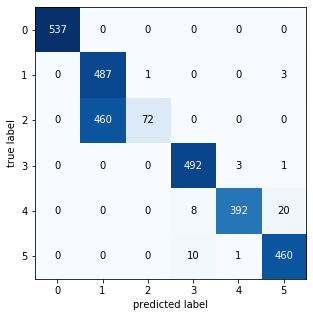

In [84]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(trainData, train_target,epochs=500,batch_size=128)
score = model.evaluate(testData, test_target, batch_size=128)
print(score)
pred = model.predict(testData)
confusionMatrix(pred)
